#### Autor: Mariano A. Tomás - 07 Abril 2021

----------

# Índice

1. Objetivos
2. Análisis de Popularidad  
    2.1. Análisis de dataset *movies*  
    2.2. Análisis de dataset *credits*  
    2.3. Unificación de datasets  
    2.4. Análisis de dependencia entre features y variable objetivo  
3. Creación de un modelo de predicción  
    3.1. Modelo básico  
    3.2. Modelo aplicando MultiLabelBinarizer Encoding
4. Conclusiones
5. Anexo

# 1. Objetivos

Utilizar los datos disponibles en https://www.kaggle.com/tmdb/tmdb-movie-metadata para realizar un análisis de popularidad de una película y crear un modelo de predicción

# 2. Análisis de Popularidad

Contamos con dos datasets: 
- `tmdb_5000_credits.csv`: contiene información de películas (género, keywords, sinopsis, etc)
- `tmdb_5000_movies.csv`: contiene información de los créditos de dichas películas (cast, crew, etc)

Ambos pueden relacionarse mediante sus respectivas columnas de Ids.

Se buscará a explorar ambos dataset para identificar las features que puedan tener mayor correlación con la variable objetivo (*popularity*), y luego se buscará unificar toda la información en un único dataset. Este dataset *final* será utilizado en la siguiente sección para entrenar un modelo que permita realizar predicciones acerca de la *popularidad* de un contenido.

In [1]:
#Importamos las bibliotecas utilizadas
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ZONA DE CONFIGURACION

# Ruta a los datasets
tmdb_credits_file_path = 'datasets/tmdb_5000_credits.csv'
tmdb_movies_file_path = 'datasets/tmdb_5000_movies.csv'

# Constantes
VALOR_NULO_STR = 'NULL'
VALOR_NULO_NUM = 0
POS_PRIMER_ACTOR = 0
LONG_FECHA = 10

In [3]:
# Carga de los datasets
tmdb_movies_data_full = pd.read_csv(tmdb_movies_file_path) 
tmdb_credits_data_full = pd.read_csv(tmdb_credits_file_path) 

## 2.1. Análisis de dataset *movies*
Comenzamos con la exploración básica del dataset

In [4]:
tmdb_movies_data_full.shape

(4803, 20)

In [5]:
# Listado de columnas del dataset Movies
tmdb_movies_data_full.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [6]:
# Contenido del dataset Movies
tmdb_movies_data_full.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [7]:
#Veamos si hay elementos duplicados en base al campo "original_title"
duplicados = tmdb_movies_data_full[tmdb_movies_data_full.duplicated(['original_title'])]
duplicados

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The true story of a small town massacre,Out of the Blue,5.9,18
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",NaN,2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203


Encontramos entonces 2 lineas que coinciden en el campo `original_title`:
- Batman
- Out of the Blue

Lo siguiente será verificar si son efectivamente contenidos repetidos o si quizás son producciones de distinto año.

En el caso de Batman, veremos que se trata del mismo titulo pero de distinto año:

In [8]:
tmdb_movies_data_full[tmdb_movies_data_full['original_title']=='Batman']

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1359,35000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",NaN,268,"[{""id"": 848, ""name"": ""double life""}, {""id"": 84...",en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1989-06-23,411348924,126.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Have you ever danced with the devil in the pal...,Batman,7.0,2096
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",NaN,2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203


In [9]:
#Igual que antes, en el caso de Out of the Blue también se trata del mismo titulo pero de distinto año
tmdb_movies_data_full[tmdb_movies_data_full['original_title']=='Out of the Blue']

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3647,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,39269,"[{""id"": 4470, ""name"": ""punk""}, {""id"": 10183, ""...",en,Out of the Blue,Dennis Hopper is a hard-drinking truck driver ...,0.679351,"[{""name"": ""Robson Street"", ""id"": 71953}]","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",1980-05-01,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A harrowing drama from the director of Easy Rider,Out of the Blue,6.5,17
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The true story of a small town massacre,Out of the Blue,5.9,18


También queremos conocer cuántos valores distintos existen en la columna original_language. Podemos verificar que son 37, del siguiente modo:

In [10]:
tmdb_movies_data_full['original_language'].value_counts().count()

37

En base a lo observado hasta este punto, haremos algunas consideraciones acerca de las features del dataset de "Movies".

- La columna objetivo es:
    - `popularity`
- Las columnas que podrían tener correlación con la variable objetivo son:
    - `budget`
    - `release_date`
    - `runtime`
- Las columnas que tienen datos anidados que podrían ser de utilidad (pero deberíamos trabajar para desanidarlos) son:
    - `genres`
    - `keywords`
    - `production_companies`
    - `production_countries`
    - `spoken_languages`
- Las columnas que vamos a eliminar del análisis por contener datos que no resultan relevantes para este caso, son:
    - `original_language`
    - `homepage`
    - `original_title`
    - `overview`
    - `status`
    - `tagline`
    - `title`
- También vamos a eliminar del análisis las columnas que podrían representar un caso de *Leakage* al estar relacionadas con la variable objetivo:
    - `revenue`
    - `vote_average`
    - `vote_count`

Nos quedamos entonces solamente con las columnas de interés:

In [11]:
features_movies = [ 'id','budget', 'original_language', 'release_date', 'runtime',
                   'genres', 'keywords','production_companies', 'production_countries','spoken_languages', 
                   'popularity' ]

tmdb_movies_data_full = tmdb_movies_data_full[features_movies].copy()

El siguiente desafío será trabajar con las columnas que tienen diccionarios anidados. La estrategia será extraer las key "name" de los diccionarios anidados y volcarlos en listas.

Adicionalmente, y dado que podria resultar de utilidad, propongo **generar dos datos nuevos** en base a la info disponible en este dataset:
- *Cantidad de Compañias de Produccion*: Será la suma de la cantidad de elementos que figuren en cada posición de la columna `production_companies`. La razón de contar con este dato es ver si existe alguna relación entre la cantidad de compañías de producción que participan en una película, y el éxito de la misma (medida en términos de popularidad)
- *El mes específico del estreno*: Se obtendrá extrayendo el número de mes del campo `release_date`. La razón de contar con este dato es verificar si existe relación entre el mes de estreno y la popularidad de la película.

In [12]:
#vemos el head del dataframe
tmdb_movies_data_full.head(3)

,id,budget,original_language,release_date,runtime,genres,keywords,production_companies,production_countries,spoken_languages,popularity
0,19995,237000000,en,2009-12-10,162.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",150.437577
1,285,300000000,en,2007-05-19,169.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",139.082615
2,206647,245000000,en,2015-10-26,148.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",107.376788


Notar que en todas las columnas que voy a desanidar está disponible la key "name", de modo que voy a definir una funcion que 
resuelva para el caso general:

In [13]:
def extract_to_list(lista):
    lista_aux=[]
    for ele in lista:
        for key, value in ele.items():
            if key == 'name':
                lista_aux.append(value)
    if not lista_aux:        
        return VALOR_NULO_STR
    return lista_aux

In [14]:
#extraemos: todos los items de la columna de genres
df_aux_movies = pd.DataFrame(columns=['id','Genres_L','Keywords_L','P_companies_L','P_countries_L','S_languages_L','Mes_estreno_L','Cant_p_companies_L'])
lista_ids = []
lista_genres = []
lista_keywords = []
lista_p_companies = []
lista_p_countries = []
lista_s_languages = []
lista_mes_estreno = []
lista_cant_p_companies = []

for index, row in tmdb_movies_data_full.iterrows():
    # Convertimos cada row de String a List, usando eval()
    row_list_genres = list(eval(row['genres']))
    row_list_keywords = list(eval(row['keywords']))
    row_list_p_companies = list(eval(row['production_companies']))
    row_list_p_countries = list(eval(row['production_countries']))
    row_list_s_languages = list(eval(row['spoken_languages']))
    
    #El dato del indice no se modifica
    lista_ids.append(row['id'])
    
    #Procesamos el listado de diccionarios para extraer la info para Genre
    lista_genres.append(extract_to_list(row_list_genres))

    #Procesamos el listado de diccionarios para extraer la info para Keywords
    lista_keywords.append(extract_to_list(row_list_keywords))
    
    #Procesamos el listado de diccionarios para extraer la info para Companies
    lista_p_companies.append(extract_to_list(row_list_p_companies))
    
    #Calculamos la cant de companias de prod involucradas
    lista_cant_p_companies.append(len(extract_to_list(row_list_p_companies)))
    
    #Procesamos el listado de diccionarios para extraer la info para Countries
    lista_p_countries.append(extract_to_list(row_list_p_countries))
    
    #Procesamos el listado de diccionarios para extraer la info para Languages
    lista_s_languages.append(extract_to_list(row_list_s_languages))
    
    #Procesamos el listado para extraer el mes específico de estreno
    fecha_estreno=row['release_date']
    if isinstance(fecha_estreno, str) and len(fecha_estreno) == LONG_FECHA: #solo procesamos los valores q esten bien formados
        fecha_estreno=fecha_estreno.split('-')
        lista_mes_estreno.append(int(fecha_estreno[1]))#extraemos el mes y lo guardamos como int
    else: #en cualquier otro caso lo consideramos dato nulo
        lista_mes_estreno.append(VALOR_NULO_NUM)


In [15]:
#construimos el nuevo dataframe en base a indices y todo el resto de los campos
df_aux_movies['id'] = lista_ids
df_aux_movies['Genres_L'] = lista_genres
df_aux_movies['Keywords_L'] = lista_keywords
df_aux_movies['P_companies_L'] = lista_p_companies
df_aux_movies['P_countries_L'] = lista_p_countries
df_aux_movies['S_languages_L'] = lista_s_languages
df_aux_movies['Mes_estreno_L'] = lista_mes_estreno
df_aux_movies['Cant_p_companies_L'] = lista_cant_p_companies

In [16]:
#veamos como quedo nuestro dataframe aux de movies
df_aux_movies.head()

,id,Genres_L,Keywords_L,P_companies_L,P_countries_L,S_languages_L,Mes_estreno_L,Cant_p_companies_L
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]","[English, Español]",12,4
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],[English],5,3
2,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]","[Français, English, Español, Italiano, Deutsch]",10,3
3,49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],[English],7,4
4,49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",[Walt Disney Pictures],[United States of America],[English],3,1


En este punto vamos a aprovechar para analizar cuantos elementos distintos hay para cada columnas recién generadas, para determinar si es viable realizar una estrategia del estilo *One Hot Encoding* (o similar) con ellos.

In [17]:
#Funcion para contar elementos distintos en listas de listas
def contar_elementos_distintos_en_lista(lista):
    flat_list = [item for sublist in lista for item in sublist]
    flat_list = list(set(flat_list))
    return len(flat_list)
  
print("Genres: ",contar_elementos_distintos_en_lista(lista_genres))
print("Keywords: ",contar_elementos_distintos_en_lista(lista_keywords))
print("Companies: ",contar_elementos_distintos_en_lista(lista_p_companies))
print("Countries: ",contar_elementos_distintos_en_lista(lista_p_countries))
print("Languages: ",contar_elementos_distintos_en_lista(lista_s_languages))

Genres:  23
Keywords:  9816
Companies:  5020
Countries:  91
Languages:  65


En base a estos números, y teniendo en cuenta que la recomendación es *no usar estrategias del estilo One Hot Encodign para más de 15 variables categóricas*, estaría tentado a deshechar a todas estas features.

Sin embargo, haré una excepción para `Genres` ya que no se trata de un número tan grande, y trataré de verificar si añade valor en la creación de los modelos que haremos más tarde.

El siguiente paso entonces es realizar un merge entre el *dataframe auxiliar* y el dataframe de *movies*:

In [18]:
tmdb_movies_data_full = pd.merge(tmdb_movies_data_full,df_aux_movies[['id',
                                                                     'Genres_L',
                                                                     'Keywords_L',
                                                                     'P_companies_L',
                                                                     'P_countries_L',
                                                                     'S_languages_L',
                                                                     'Mes_estreno_L',
                                                                     'Cant_p_companies_L']],
                                  on='id', 
                                  how='left')

In [19]:
#Como ya tenemos las nuevas columnas en el dataframe, descartamos las columnas con info repetida
tmdb_movies_data_full = tmdb_movies_data_full.drop(['genres',
                                                    'keywords',
                                                    'production_companies',
                                                    'production_countries',
                                                    'spoken_languages'], axis=1)
tmdb_movies_data_full.head(3)

,id,budget,original_language,release_date,runtime,popularity,Genres_L,Keywords_L,P_companies_L,P_countries_L,S_languages_L,Mes_estreno_L,Cant_p_companies_L
0,19995,237000000,en,2009-12-10,162.0,150.437577,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]","[English, Español]",12,4
1,285,300000000,en,2007-05-19,169.0,139.082615,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],[English],5,3
2,206647,245000000,en,2015-10-26,148.0,107.376788,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]","[Français, English, Español, Italiano, Deutsch]",10,3


## 2.2. Análisis de dataset *credits*
El siguiente paso será trabajar sobre el dataframe *credits*, analizando su contenido y viendo qué tipo de información podemos extraer de él.

In [20]:
tmdb_credits_data_full.shape

(4803, 4)

In [21]:
#Vamos a listar las columnas del dataset
tmdb_credits_data_full.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [22]:
tmdb_credits_data_full.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


En base a lo observado hasta este punto podríamos hacer algunas consideraciones acerca de las columnas del dataset de *Credits*.

- Las columnas que podrían tener correlación con la variable objetivo son:
    - `cast`
    - `crew`
- Las columnas que vamos a eliminar del análisis porque no aportan valor al análisis de popularidad son:
    - `title`

Tal como sucedió antes, tanto `cast` como `crew` tienen la información anidada de modo que vamos a tener que trabajar sobre ello. Se propone **crear cuatro nuevos datos** que podrían tener relación con la popularidad:
- Nombre del director: Podría ser de utilidad si encontramos que los principales Directores/as son una cantidad reducida de nombres.
- Nombre del actor principal: Se obtiene extrayendo el primer elemento del listado de Cast. Podría ser de utilidad si encontramos que los principales Actores/Actrices son una cantidad reducida de elementos.
- Cantidad de actores que participaron en la película: Se obtiene al sumar la cantidad de elementos presentes en Cast. Podría ser de utilidad para ver si hay correlación entre la cantidad de actores y la popularidad de una pelicula.
- Cantidad de personas que participaron en la películas: Se obtiene al sumar la cantidad de elementos presentes en Crew.  Podría ser de utilidad para ver si hay correlación entre la cantidad de gente que trabajó en una película y la popularidad de la misma.



In [23]:
#extraemos director de la columna de crow, y el actor principal de la columna de Cast.
#ademas generamos las nuevas medidas: Cant_Cast y Cant_Crew
df_aux_credits = pd.DataFrame(columns=['movie_id','Director','Actor','Cant_Cast','Cant_Crew'])
lista_directores = []
lista_actores = []
lista_indices = []
lista_cant_cast = []
lista_cant_crew = []

for index, row in tmdb_credits_data_full.iterrows():
    
    #inicializamos a cero las dos variables que vamos a necesitar para contar la cant de crew y cast
    cant_cast = 0
    cant_crew = 0    
    
    #Inicialmente row es un string, asi que aprovechamos para contar cuantas veces aparece "name"
    #En base a eso cargamos los valores para cant_crew y cant_cast
    cant_crew=row['crew'].count("name")
    lista_cant_crew.append(cant_crew)
    cant_cast=row['cast'].count("name")
    lista_cant_cast.append(cant_cast)   
        
    # Convertimos las row (que son string) a list usando eval()
    row_list_cast = list(eval(row['cast']))
    row_list_crew = list(eval(row['crew']))
    
    #Se filtra el listado de diccionarios para encontrar el que tenga key "job" = "director" (el director)
    list_filtered_crew = list(filter(lambda tag: tag["job"]=='Director', row_list_crew))
    #Guardamos el dato del director (si existe). Si no, se guarda valor nulo.
    if not list_filtered_crew:       
        lista_directores.append(VALOR_NULO_STR)
    else: 
        lista_directores.append(list_filtered_crew[POS_PRIMER_ACTOR].get('name'))
    
    #Se filtra el listado de diccionarios para encontrar el que tenga key "order" = 0 (el "primer" actor del listado)
    list_filtered_cast = list(filter(lambda tag: tag["order"]==POS_PRIMER_ACTOR, row_list_cast))
    #Guardamos el dato del actor principal (si existe). Si no, se guarda valor nulo.
    if not list_filtered_cast:        
        lista_actores.append(VALOR_NULO_STR)
    else:
        lista_actores.append(list_filtered_cast[POS_PRIMER_ACTOR].get('name'))

    #El dato del indice se mantiene intacto
    lista_indices.append(row['movie_id'])    
        

In [24]:
#construimos el nuevo DF auxiliar para este caso:
df_aux_credits['movie_id'] = lista_indices
df_aux_credits['Director'] = lista_directores
df_aux_credits['Actor'] = lista_actores
df_aux_credits['Cant_Crew'] = lista_cant_crew
df_aux_credits['Cant_Cast'] = lista_cant_cast

In [25]:
df_aux_credits.head()

,movie_id,Director,Actor,Cant_Cast,Cant_Crew
0,19995,James Cameron,Sam Worthington,83,153
1,285,Gore Verbinski,Johnny Depp,34,32
2,206647,Sam Mendes,Daniel Craig,83,155
3,49026,Christopher Nolan,Christian Bale,158,217
4,49529,Andrew Stanton,Taylor Kitsch,27,132


In [26]:
#Veamos la cantidad de repeticiones de "Directores"
df_aux_credits['Director'].value_counts()

NULL                30
Steven Spielberg    27
Woody Allen         21
Martin Scorsese     20
Clint Eastwood      20
                    ..
Robert Cary          1
Robert Mulligan      1
Elaine May           1
René Féret           1
Ari Sandel           1
Name: Director, Length: 2350, dtype: int64

In [27]:
#Veamos la cantidad de repeticiones de "Actores"
df_aux_credits['Actor'].value_counts()

NULL              223
Robert De Niro     30
Bruce Willis       30
Nicolas Cage       28
Johnny Depp        27
                 ... 
Peter Sallis        1
Teri Polo           1
Kyle Hoskins        1
Prabhu Deva         1
Robert Carlyle      1
Name: Actor, Length: 1972, dtype: int64

Con estos números podemos concluir que:
- Existen 2349 actores distintos
- Existen 1971 directores distintos

Por lo tanto no sería una buena opción una estrategia *One Hot Encoding* para este caso ya que sumaría más de cuatro mil features al dataset. Quitamos entonces estas dos columnas del análisis.

A continuación hacemos un merge entre el dataframe *aux* y el de *credits*

In [28]:
tmdb_credits_data_full = pd.merge(tmdb_credits_data_full,df_aux_credits[['movie_id','Cant_Crew','Cant_Cast']],
                                  on='movie_id', 
                                  how='left')

In [29]:
tmdb_credits_data_full.head()

,movie_id,title,cast,crew,Cant_Crew,Cant_Cast
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",153,83
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",32,34
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",155,83
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",217,158
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",132,27


De `tmdb_credits_data_full` nos vamos a quedar solamente con los nuevos campos creados a partir de los datos existentes:

In [30]:
features_credits = ['movie_id','Cant_Cast','Cant_Crew']

tmdb_credits_data_full = tmdb_credits_data_full[features_credits].copy()

In [31]:
tmdb_credits_data_full.head()

,movie_id,Cant_Cast,Cant_Crew
0,19995,83,153
1,285,34,32
2,206647,83,155
3,49026,158,217
4,49529,27,132


## 2.3. Unificación de datasets

A continuacion, hacemos un Left Join del dataset *movies* con el de *credits*

In [32]:
#Left join de datasets
left = tmdb_movies_data_full.set_index(['id'])
right = tmdb_credits_data_full.set_index(['movie_id'])

tmdb_unificado_full = left.join(right, lsuffix='_MOV', rsuffix='_CRED')

In [33]:
tmdb_unificado_full.head(3)

,budget,original_language,release_date,runtime,popularity,Genres_L,Keywords_L,P_companies_L,P_countries_L,S_languages_L,Mes_estreno_L,Cant_p_companies_L,Cant_Cast,Cant_Crew
id,,,,,,,,,,,,,,
19995,237000000,en,2009-12-10,162.0,150.437577,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]","[English, Español]",12,4,83,153
285,300000000,en,2007-05-19,169.0,139.082615,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],[English],5,3,34,32
206647,245000000,en,2015-10-26,148.0,107.376788,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]","[Français, English, Español, Italiano, Deutsch]",10,3,83,155


## 2.4. Análisis de dependencia entre features y variable objetivo

A continuación vamos a graficar la dependencia entre:
- Popularidad vs Budget
- Popularidad vs Runtime
- Popularidad vs Cantidad de actores
- Popularidad vs Cantidad de personas formando el Cast
- Popularidad vs Mes de Estreno
- Popularidad vs Cant. de compañias asociadas en la producción

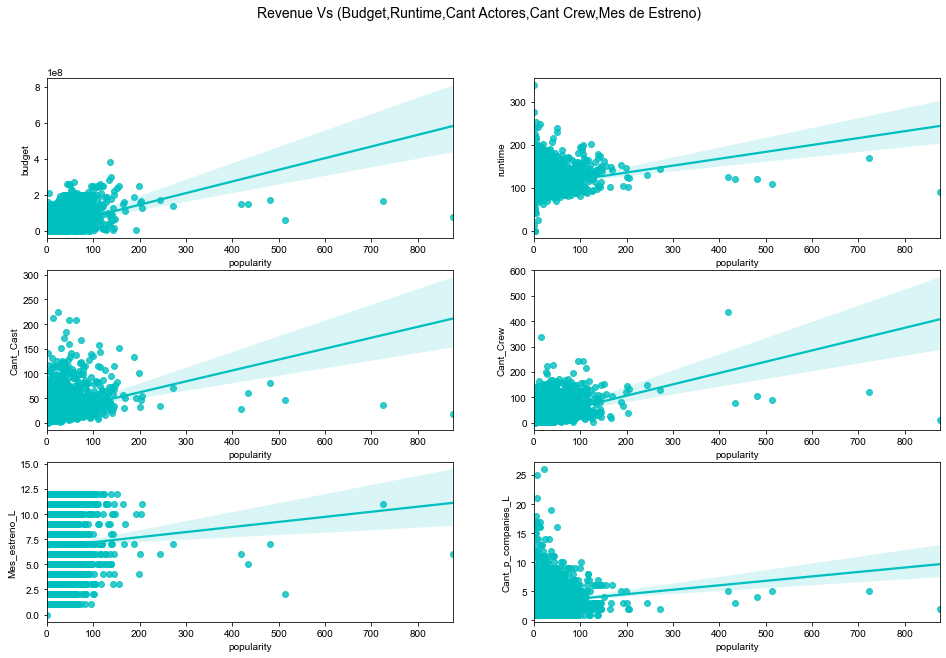

In [34]:
fig, axes = plt.subplots(3,2,figsize = (16,10))
fig.suptitle("Revenue Vs (Budget,Runtime,Cant Actores,Cant Crew,Mes de Estreno)",fontsize=14)
sns.regplot(x=tmdb_unificado_full['popularity'], y=tmdb_unificado_full['budget'],color='c',ax=axes[0][0])
sns.regplot(x=tmdb_unificado_full['popularity'], y=tmdb_unificado_full['runtime'],color='c',ax=axes[0][1])
sns.regplot(x=tmdb_unificado_full['popularity'], y=tmdb_unificado_full['Cant_Cast'],color='c',ax=axes[1][0])
sns.regplot(x=tmdb_unificado_full['popularity'], y=tmdb_unificado_full['Cant_Crew'],color='c',ax=axes[1][1])
sns.regplot(x=tmdb_unificado_full['popularity'], y=tmdb_unificado_full['Mes_estreno_L'],color='c',ax=axes[2][0])
sns.regplot(x=tmdb_unificado_full['popularity'], y=tmdb_unificado_full['Cant_p_companies_L'],color='c',ax=axes[2][1])
sns.set_style("whitegrid")

En todos los casos se observa una dependencia directa entre las variables analizadas, de modo que podemos asumir que todas ellas nos van a ayudar a construir un mejor modelo para la predicción de *popularidad*.

# 3. Crear un modelo de predicción

A continuación vamos encarar dos estrategias:
1. Realizar un modelo básico (sin considerar la feature Genre)
2. Realizar un modelo utilizando MultiLabelBinarizer Encoding (para utilizar la feature Genre)

En ambos casos se van a utilizar modelos Random Forest, con ayuda de la biblioteca scikit-learn. La elección de este modelo se basó en la simplicidad de su implementación.

Para poder validar cada modelo vamos a dividir el dataset en  dos partes: un set de entrenamiento y un set de validación (naturalmente, cada modelo tendrá sus propios sets de entrenamiento y validación)

Finalmente vamos a comparar los resultados obtenidos con cada modelo, para lo cual vamos a basarnos en el Mean Absolute Error (MAE) de cada modelo. Este error se obtiene en base al set de validación, del siguiente modo: 
* Se calcula el error de cada predicción: `error = val_real - valor_pred`
* Se calcula la media del valor absoluto de todos los errores

En otras palabras, el MAE permite decir por cuánto -en media- nuestro modelo se está equivocando.

## 3.1. Modelo básico

En este primer caso vamos a quitar la columna Genre debido a que es una variable categórica y no la podemos usar tal cual está para este modelo (en la próxima sección trabajaremos con ella para poder utilizarla).

In [35]:
#Importamos las bibliotecas que vamos a utilizar
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [36]:
# Quitamos las filas con valores faltantes en todo el dataset
tmdb_unificado_full_filtrado = tmdb_unificado_full.dropna(axis=0)

#Features que nos ineresa utilizar para el modelo
features = ['popularity','budget','runtime','Mes_estreno_L','Cant_p_companies_L','Cant_Cast','Cant_Crew']

X = tmdb_unificado_full_filtrado[features].copy()

# Por las dudas, revisamos que no hayan quedado elementos vacios en la variable objetivo
X.dropna(axis=0, subset=['popularity'], inplace=True)

# Separamos la variable objetivo del dataset
y = X.popularity             
X.drop(['popularity'], axis=1, inplace=True)

# Dividimos test_set y validation_set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                              random_state=0)
# Definimos el modelo
forest_model_basico = RandomForestRegressor(random_state=1)

# Ajustamos el modelo con nuestro set de entrenamiento
forest_model_basico.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

Ahora sí, calculamos el MAE sobre el set de validación:

In [37]:
predicciones_basico = forest_model_basico.predict(X_valid)
val_mae_basico = mean_absolute_error(y_valid, predicciones_basico)
print("MAE del modelo básico de Random Forest: {}".format(val_mae_basico))

MAE del modelo básico de Random Forest: 12.581588540627653


## 3.2. Modelo aplicando MultiLabelBinarizer Encoding

En este caso la estrategia será:
- "Abrir" la feature Genre en tantas columnas como valores distintos pueda tomar dicha columna (es decir, creamos nuevas features)
- Colocar '1' en las nuevas features donde coincida con el Genre que tenga cada contenido, y dejar '0' en los demas lugares
- Quitar la columna Genre original
- Usar este nuevo data set "ampliado" con más features para entrenar el modelo

Finalmente, al igual que en el caso anterior, calcularemos el MAE.

In [38]:
#Importamos las bibliotecas que vamos a utilizar
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [39]:
# Quitamos las filas con valores faltantes en todo el dataset
tmdb_unificado_full_filtrado = tmdb_unificado_full.dropna(axis=0)

#Features que vamos a utilizar para entrenar el modelo
features = ['popularity','Genres_L','budget','runtime','Mes_estreno_L','Cant_p_companies_L','Cant_Cast','Cant_Crew']

X = tmdb_unificado_full_filtrado[features].copy()

# Por las dudas, revisamos que no hayan quedado elementos vacios en la variable objetivo
X.dropna(axis=0, subset=['popularity'], inplace=True)

# Separamos la variable objetivo del dataset
y = X.popularity             
X.drop(['popularity'], axis=1, inplace=True)

In [40]:
#Inicializamos MultiLabelBinarizer
mlb = MultiLabelBinarizer()

object_cols = "Genres_L"

# Aplicamos MultiLabelBinarizer a las columnas categoricas de interes
MLB_X_cols = pd.DataFrame(mlb.fit_transform(X[object_cols]),columns=mlb.classes_)

# MultiLabelBinarizer quito los indices, asi que los volvemos a colocar
MLB_X_cols.index = X.index

# Quitar las columnas categoricas (seran reemplazadas con el MLB encoding)
num_X = X.drop(object_cols, axis=1)

# Agregamos las columnas luego del MultiLabelBinarizer encoding, que ahora son numericas
MLB_X = pd.concat([num_X, MLB_X_cols], axis=1)

In [41]:
# Dividimos test_set y validation_set
X_train_MLB, X_valid_MLB, y_train_MLB, y_valid_MLB = train_test_split(MLB_X, y, train_size=0.8, test_size=0.2,
                                                              random_state=0)

# Definimos el modelo
forest_model_MLB = RandomForestRegressor(random_state=1)

# Ajustamos el modelo con nuestro set de entrenamiento
forest_model_MLB.fit(X_train_MLB,y_train_MLB)

RandomForestRegressor(random_state=1)

Finalmente, calculamos el MAE sobre el set de validación:

In [42]:
predicciones_MLB = forest_model_MLB.predict(X_valid_MLB)
val_mae_MLB = mean_absolute_error(y_valid_MLB, predicciones_MLB)
print("MAE del modelo Random Forest usando MLB: {}".format(val_mae_MLB))

MAE del modelo Random Forest usando MLB: 12.345002981893726


# 4. Conclusiones

Se pudo realizar el análisis de los datasets enfocados en entender qué factores afectan la *popularidad* de una película, y se construyeron modelos para predecir dicho valor.

Respecto a los datasets, en ambos se encontraron gran cantidad de datos anidados en las celdas lo cual requería cierto trabajo para extraer esa información y convertirla en datos útiles para el modelo. Si bien se trabajó en extraer solamente algunos de esos datos anidados, podrían explorarse la estrategia de aplicar MultiLabelBinarizer Encoding a otras features, como Actores y Directores, para ver si existe correlación entre esos datos y la popularidad del contenido.

Respecto a los modelos construidos, el segundo resultó levemente más complejo que el primero. Durante la construcción del segundo modelo se debió prestar especial cuidado en utilizar MultiLabelBinarizer Encoding antes de dividir los set de entrenamiento y validación, ya que si se lo aplica posteriormente puede conducir a incosistencias en la cantidad de features disponibles en ambos sets (impidiendo usar los datos de validación para ese fin).

Respecto a los resultados obtenidos, notamos que el segundo modelo tuvo un mejor desempeño en cuanto al error en las predicciones: 
- MAE del modelo básico de Random Forest: 12.581588540627653
- MAE del modelo Random Forest usando MLB: 12.345002981893726

Concluímos entonces que resultó beneficiosa la estrategia de "abrir" la feature Genre, disponiendo de más features con los cuales entrenar el modelo, logrando reducir media del error en las predicciones.

# 5. Anexo

Bibliotecas utilizadas:
- python: v3.6.13
- pandas: v1.1.3
- scikit-learn: v0.23.2.
- seaborn: v0.11.0
- matplotlib: v3.3.1
